<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Build/blob/master/build1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

#url_label ="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data

--2020-06-24 08:44:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [application/x-httpd-php]
Saving to: ‘parkinsons.data’

parkinsons.data     100%[===================>]  39.74K  --.-KB/s    in 0.1s    

2020-06-24 08:45:00 (301 KB/s) - ‘parkinsons.data’ saved [40697/40697]



In [ ]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   

import pandas as pd
import numpy as np


In [ ]:
data_set = pd.read_csv(url)
# data_set_labels = pd.read_csv(url_label,sep='\s+', header=None)

In [ ]:
print(data_set.shape)
data_set.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data_set.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
X = data_set.iloc[:,1:].drop(labels="status", axis=1)
y = data_set["status"]
print(f'data: {X.shape}\nlabel: {y.shape}')

data: (195, 22)
label: (195,)


In [ ]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Dropping NaN columns with void_pct parameter

In [ ]:
X.isna().sum(axis=0).sort_values(axis=0, ascending=False, inplace=False)

PPE                 0
D2                  0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
MDVP:Fo(Hz)         0
dtype: int64

* check the total number of NaNs

In [ ]:
X.isna().sum(axis=0).sum(axis=0)

0

# Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import math
import numpy.linalg as LA
from scipy import stats
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
scaler = StandardScaler()
z_fit = scaler.fit_transform(X)

print(z_fit.shape, type(z_fit))


(195, 22) <class 'numpy.ndarray'>


# Remove low std columns from standardized data





In [ ]:
Z=pd.DataFrame(data=z_fit, columns=X.columns)

In [ ]:
# column labels with low standardized std
Z_std = Z.std(axis=0)
col_0std = Z_std[Z_std.le(0.05)].index.values

print(type(col_0std))
print(Z_std.index.values.shape)
col_0std.shape

<class 'numpy.ndarray'>
(22,)


(0,)

In [ ]:
X = X.drop(labels=col_0std, axis=1)
X.shape

(195, 22)

# Check for duplicate columns


In [ ]:
X.T.duplicated(keep='first').sum()

0

# Removing Correlated Features


In [ ]:
M_corr = X.corr()

In [ ]:
corr_pct = 0.95
col_corr = set()
for i in range(len(M_corr.columns)):
    for j in range(i):
        if abs(M_corr.iloc[i, j]) > corr_pct:
            col = M_corr.columns[i]
            col_corr.add(col)
print(len(col_corr))


9


In [ ]:
X = X.drop(labels=col_corr, axis=1, inplace=False)
X.shape

(195, 13)

# Merge cleaned up dataset with class labels

In [ ]:
df = pd.merge(X, y, left_index=True, right_index=True)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
print(df.shape)
X.shape

(195, 23)


(195, 22)

In [ ]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# PCA Dimension Reduction

In [ ]:
# scaler = StandardScaler()
z_fit = scaler.fit_transform(X.values)
Z = pd.DataFrame(z_fit, index=X.index, columns=X.columns)
print(z_fit.shape, type(z_fit))

(195, 22) <class 'numpy.ndarray'>


In [ ]:
pca = PCA()
pca_features = pca.fit_transform(Z.values)
print(pca_features.shape, type(pca_features))

(195, 22) <class 'numpy.ndarray'>


In [ ]:
X_var_ratio = X.var()/(X.var().sum())

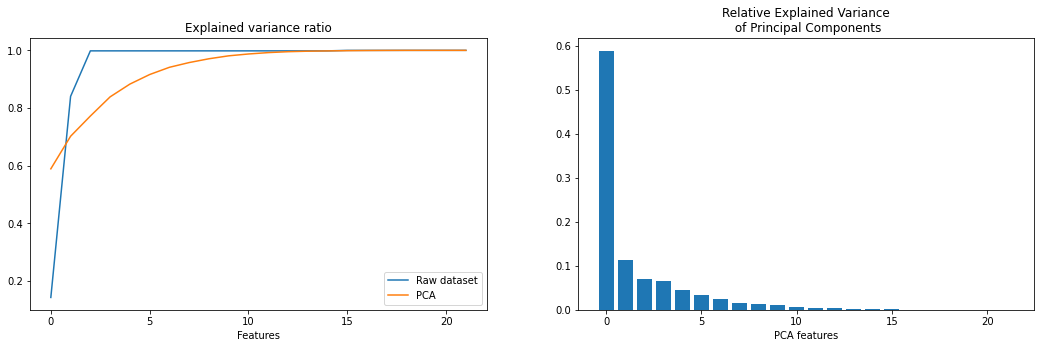

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
ax1.plot(range(len(X.var())), X_var_ratio.cumsum(), label="Raw dataset")
ax1.plot(range(len(X.var())), np.cumsum(pca.explained_variance_ratio_), label="PCA")

ax1.set_title("Explained variance ratio")
ax1.set_xlabel('Features')
ax1.axis('tight')
ax1.legend(loc='lower right')

ax2.bar(x=range(len(X.columns)), height=pca.explained_variance_ratio_)

ax2.set_title('Relative Explained Variance\n of Principal Components')
ax2.set_xlabel('PCA features')

plt.show()

* Dimension reduction for 95% of explained variance

In [ ]:
result = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)
print(type(result), len(result))
result

<class 'tuple'> 1


(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),)

In [ ]:
pca = PCA(result[0][0])
pca_features = pca.fit_transform(Z.values)
print(pca_features.shape, type(pca_features))

(195, 7) <class 'numpy.ndarray'>


In [ ]:
df_pca = pd.DataFrame(pca_features)
df_pca.shape

(195, 7)

* 2D plot of the first 2 PCA components

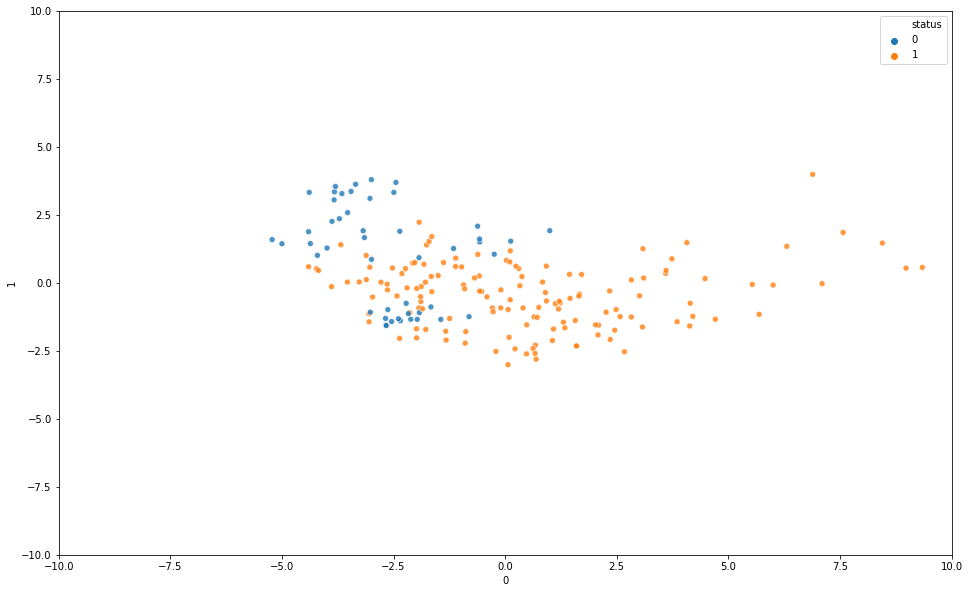

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= df_pca.iloc[:,0], y= df_pca.iloc[:,1],
    hue=y,
    legend="full",
    alpha=0.8
)
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()


* 3D plot of the first 3 PCA components

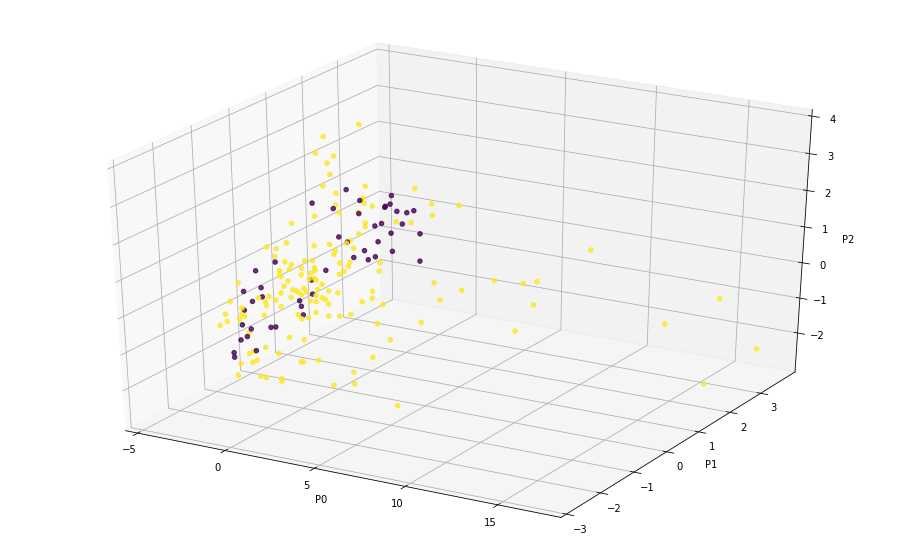

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca.iloc[:,0], 
    ys=df_pca.iloc[:,1], 
    zs=df_pca.iloc[:,2],
    c=y, 
    cmap='viridis', 
    alpha=0.8
)
ax.set_xlabel('P0')
ax.set_ylabel('P1')
ax.set_zlabel('P2')
ax.set_xlim3d(df_pca.iloc[:,0].min(),df_pca.iloc[:,0].max())
ax.set_ylim3d(df_pca.iloc[:,1].min(),df_pca.iloc[:,1].max())
ax.set_zlim3d(df_pca.iloc[:,2].min(),df_pca.iloc[:,2].max())


plt.show()

# Univariate feature selection with SelectKBest for feature scoring
* ANOVA F-value between each feature and the target vector.








In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
# from sklearn.pipeline import Pipeline


In [ ]:
# Create an SelectKBest object to select features with three best ANOVA F-Values
fval_sel = SelectKBest(f_classif, k=3)

# Apply the SelectKBest object to the features and target
kbest_scores = fval_sel.fit_transform(df_pca, y)
print(kbest_scores.shape, type(kbest_scores))
kbest_scores[0]


(195, 3) <class 'numpy.ndarray'>


array([ 2.0966143 , -1.55060712, -1.26506987])

In [ ]:
kmean_col = df_pca[df_pca.columns[fval_sel.get_support()]].columns
kmean_col

Int64Index([0, 1, 2], dtype='int64')

In [ ]:
# scores gives a positive number.
# for very small pvals, score gives a bigger number
# small pvals reject null hypothesis, meaning that column
# is dependant on y label
#scores are normalized to max of 1
scores = -np.log10(fval_sel.pvalues_)
scores /= scores.max()

x_indices = np.arange(df_pca.shape[-1])

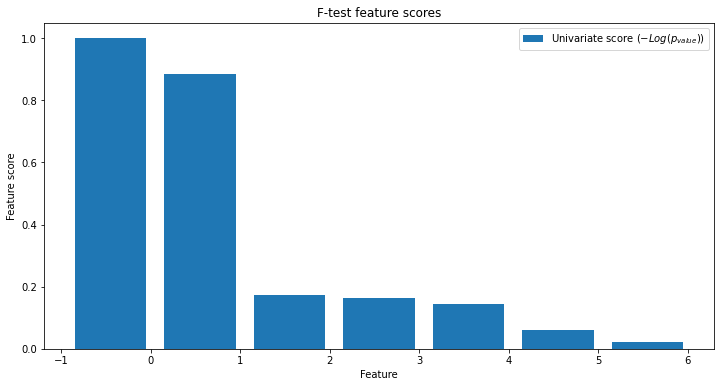

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(12,6))
ax1.bar(x_indices -.45, sorted(scores, reverse=True), label=r'Univariate score ($-Log(p_{value})$)')
ax1.set_title("F-test feature scores")
ax1.set_xlabel('Feature')
ax1.set_ylabel('Feature score')

ax1.axis('tight')
ax1.legend(loc='upper right')

plt.show()

* 2D plot of the first 2 Kmean clusters

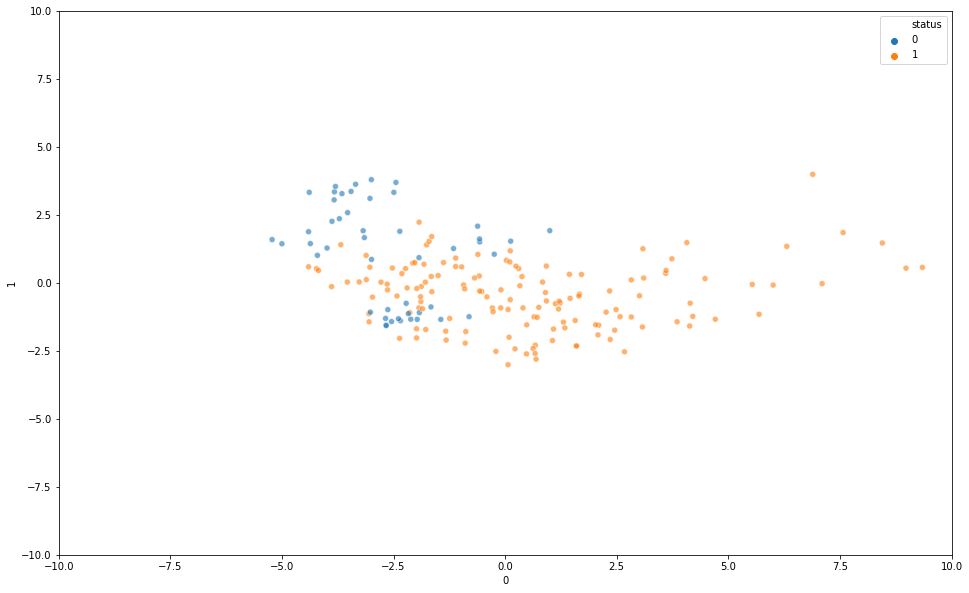

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= df_pca.iloc[:,kmean_col[0]], y= df_pca.iloc[:,kmean_col[1]],
    hue=y,
    legend="full",
    alpha=0.6
)
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()


* 3D plot of the first 3 PCA components

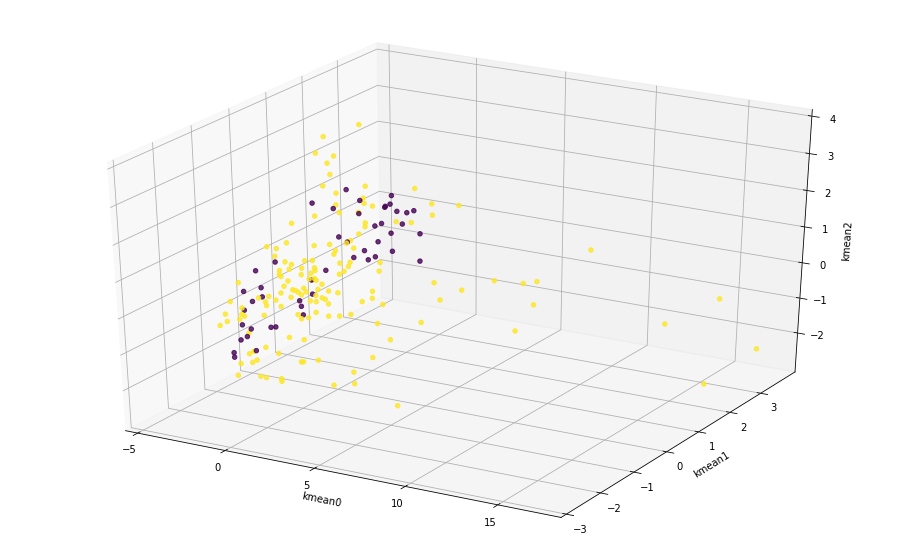

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca.iloc[:,kmean_col[0]], 
    ys=df_pca.iloc[:,kmean_col[1]], 
    zs=df_pca.iloc[:,kmean_col[2]],
    c=y, 
    cmap='viridis', alpha=0.8
)
ax.set_xlabel('kmean0')
ax.set_ylabel('kmean1')
ax.set_zlabel('kmean2')
ax.set_xlim3d(df_pca.iloc[:,kmean_col[0]].min(),df_pca.iloc[:,kmean_col[0]].max())
ax.set_ylim3d(df_pca.iloc[:,kmean_col[1]].min(),df_pca.iloc[:,kmean_col[1]].max())
ax.set_zlim3d(df_pca.iloc[:,kmean_col[2]].min(),df_pca.iloc[:,kmean_col[2]].max())


plt.show()

# T-Distributed Stochastic Neighbouring Entities (t-SNE) on reduced PCA features

In [ ]:
import time
from sklearn.manifold import TSNE

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_pca.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 195 samples in 0.000s...
[t-SNE] Computed neighbors for 195 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 195 / 195
[t-SNE] Mean sigma: 1.776132
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.760361
[t-SNE] KL divergence after 300 iterations: 2.554854
t-SNE done! Time elapsed: 1.1192193031311035 seconds


(-101.6505355834961, 124.73857116699219)

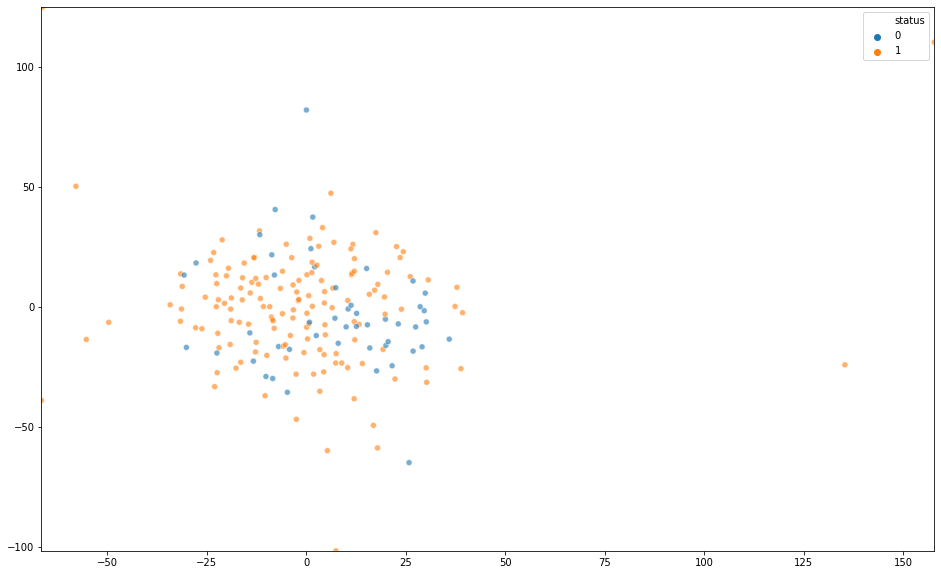

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= tsne_results[:,0], y= tsne_results[:,1],
    hue=y,
    legend="full",
    alpha=0.6
)
plt.xlim(tsne_results[:,0].min(), tsne_results[:,0].max())
plt.ylim(tsne_results[:,1].min(), tsne_results[:,1].max())



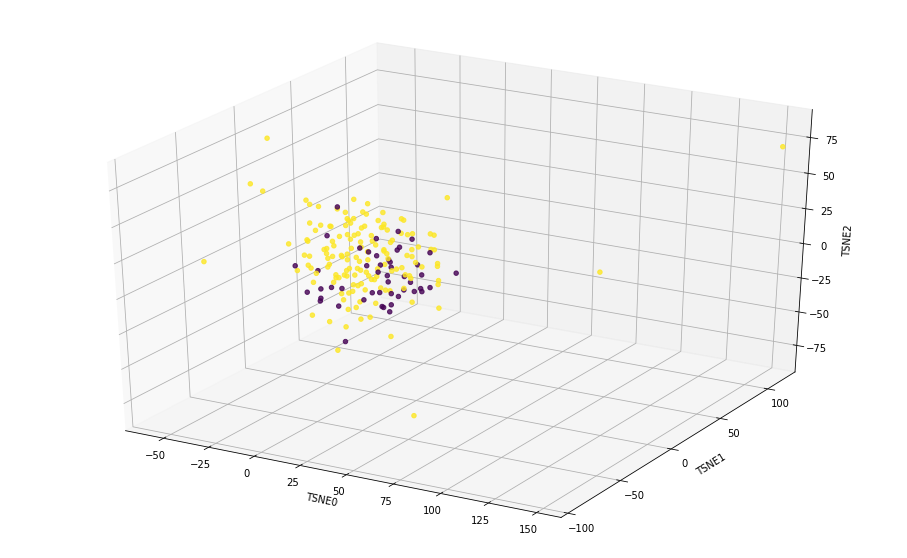

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne_results[:,0], 
    ys=tsne_results[:,1], 
    zs=tsne_results[:,2],
    c=y, 
    cmap='viridis', alpha=0.8
)
ax.set_xlabel('TSNE0')
ax.set_ylabel('TSNE1')
ax.set_zlabel('TSNE2')
ax.set_xlim3d(tsne_results[:,0].min(), tsne_results[:,0].max())
ax.set_ylim3d(tsne_results[:,1].min(), tsne_results[:,1].max())
ax.set_zlim3d(tsne_results[:,2].min(), tsne_results[:,2].max())

plt.show()

##  T-Distributed Stochastic Neighbouring Entities (t-SNE) on reduced *PCA*

# general plots:

In [ ]:
df_pca.iloc[:,:3]

,0,1,2
0,1.182320,-1.679669,-1.110929
1,2.441885,-1.334971,-1.329587
2,1.927392,-1.660460,-1.716521
3,2.168895,-1.611804,-1.480954
4,2.610189,-1.454657,-2.326452
...,...,...,...
190,-0.442078,1.282022,0.496726
191,-0.562405,1.635611,0.498716
192,1.233688,1.847313,-0.380126
193,-0.193970,2.143753,0.852668


In [ ]:
pd_cat = pd.concat([df_pca.iloc[:,:3],y], axis=1)

In [ ]:
# Scatter Plot with Hue for visualizing data in 3-D
# cols = [0,1,2, y]
pp = sns.pairplot(pd_cat, hue=y, size=1.8, aspect=1.8, 
                  # palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('First 3 PCA features Pairwise Plots', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: ignored

In [ ]:
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(nan, nan, '0'), Text(-1.3379182255553193, -0.09141207109640971, '1')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


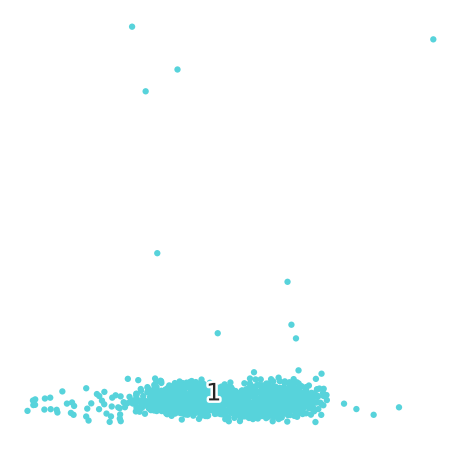

In [ ]:
fashion_scatter(df_pca.iloc[:,:2].values,dfL_pca["yield"])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


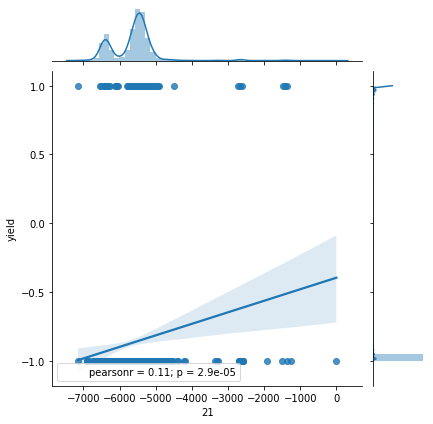

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


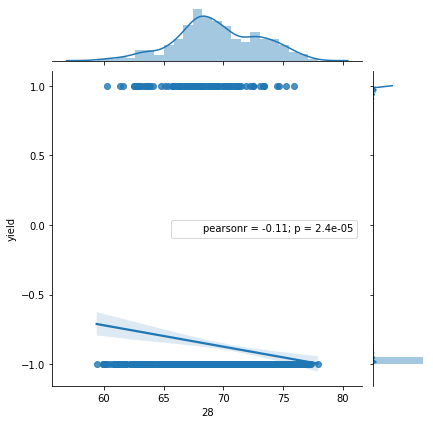

In [ ]:
def plot_join_plot(df, feature, target):
  j = sns.jointplot(feature, target, data = df, kind ='reg')
  j.annotate(stats.pearsonr)
  return plt.show()

# train_df = pd.concat([X_train, y_train], axis =1)
plot_join_plot(df, kmean_col[0], dfL["yield"])
plot_join_plot(df, kmean_col[1], dfL["yield"])

In [ ]:
dfL['yield']

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1559   -1
1560   -1
1562   -1
1563   -1
1565   -1
Name: yield, Length: 1564, dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


AttributeError: ignored

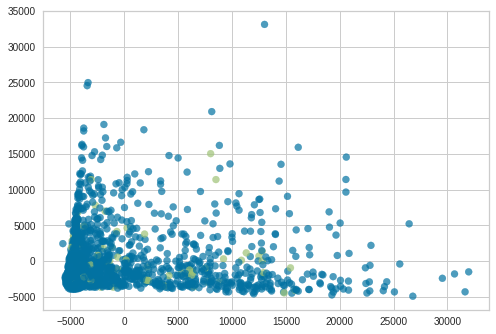

In [ ]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
classes = [-1, 1]

# Instantiate the visualizer
viz = Manifold(manifold="tsne", classes=classes)

viz.fit_transform(dfD, dfL["yield"])  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure


############

In [ ]:
# ax = sns.pairplot(data= df[col_max_corr],hue=col_max_corr[0] ,kind='scatter')

In [ ]:
#correlation map
# f,ax = plt.subplots(figsize=(25, 40))
# sns.heatmap(M_corr, annot=True, linewidths=.5, fmt= '.2f',ax=ax)

Importing Required Libraries and Dataset


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold



Splitting Data Into Training and Test Sets


In [ ]:
# train_features, test_features, train_labels, test_labels = train_test_split(
#     santandar_data.drop(labels=['TARGET'], axis=1),
#     santandar_data['TARGET'],
#     test_size=0.2,
#     random_state=41)

exclude non-numeric columns

In [ ]:
# num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numerical_columns = list(paribas_data.select_dtypes(include=num_colums).columns)
# paribas_data = paribas_data[numerical_columns]

SelectKbest: get's the features vs target y that reject null hypothesis.

In [ ]:
# import seaborn as sns
# import warnings
# importfrom scipy import stats
# from scipy.stats.stats import pearsonr
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
# %matplotlib inline
# warnings.filterwarnings("ignore")
# pd.set_option("display.expand_frame_repr", False)


In [ ]:
# drive.mount("/content/drive")
# path = "/content/drive/My Drive/data.csv")
# df = pd.read_csv(path)
# print("Total rows = {}".format(df.shape(0)))
# print("Total cols = {}".format(df.shape(1)))


In [ ]:
# X = df.loc[:,df.columns != target_col]
# y = df.loc[:, target_col]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

For regression: f_regression, mutual_info_regression
For classification: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [ ]:
# pearsonr(X_train["X4"], y_train)
# out_lus =[]
# for column in X_train.columns:
#   corr_tuple = pearsonr(X_train[column], y_train)
#   out_list.append([column, corr_tuple[0], corr_tuple[1]])

# corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])

In [ ]:
# # Show results
# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_kbest.shape[1])

2) use f test
statistics
one-way ANOVA :
http://vassarstats.net/textbook/, chapter 14
ANOVA for regression:
http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
Sklearn
f test for classification:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
f test for regression:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

In [ ]:
# sel_f = SelectKBest(f_classif, k=4)
# X_train_f = sel_f.fit_transform(X_train, y_train)
# print(sel_f.get_support())
# output:
# [ True  True  True  True False False False False False False False False False False]

visualization

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

#  **#####**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# from sklearn.datasets import load_iris

In [ ]:
# motivation of feature selection
# Adding more features make the model more complex, and the model may overfit the data. By removing the unimportant features,
# the model may generalize better. 
# this totorial is based on the material on sklearn website and other resources. Please see the reference at the end.

get the data¶


In [ ]:
#@title
# Read the data, for more information of this data: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#@title

print(X[: 5, :])
print(X.shape)
# the data have 4 features.

In [ ]:
# Before applying feature selection method, we need to split the data first.
# The reason for this is that we only select features based on the information on the training set, not on the whole data set. 
# We should keep part of the whole data set as test set to evaluate the performance of the feature selection and the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
X_train.shape

Removing features with low variance¶


In [ ]:
# VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance
# doesn’t meet some threshold. By default, it removes all zero-variance features, 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold

In [ ]:
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
X_train_remove_variance.shape
# The data still has 14 features, none of the features were removed

Univariate feature selection¶


In [ ]:
# Univariate feature selection works by selecting the best features based on univariate statistical tests.
# we compare each feature to the target variable, to see whether there is statistially significant relationship between them.
# It is also called analysis of variance (ANOVA). 
# When we analyze the relationship between one feature and the target variable  
# we ignore the other features. That is why it is called 'univariate'.
# Each feature has its own test score. 
# Finally, all the test scores are compared, and the features with top scores will be selected.

In [ ]:
# (2) use f test 
# a. statistics
#   one-way ANOVA : http://vassarstats.net/textbook/  , chaper 14
#   ANOVA for regression: http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
# b.  sklearn
# f test for classification: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
# f test for regression: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

sel_f = SelectKBest(f_classif, k=4)
X_train_f = sel_f.fit_transform(X_train, y_train)

print(sel_f.get_support())
print(sel_f.get_params())

# The f test can correctly select the original features


Let's compare the performance before and after the feature selection¶


(1) Before feature selection¶


In [ ]:

model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train, y_train)

In [ ]:

predict = model_logistic.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

(2) After feature selection¶


In [ ]:

# we use the result from the feature selection based on the chi squre test
# X_train_chi2 is the data after the feature selection to feed into the model

model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train_chi2, y_train)

In [ ]:

# We also need to transform the test data because the number of features were changed

X_test_chi2 = sel_chi2.transform(X_test)
print(X_test.shape)
print(X_test_chi2.shape)

# Only use the features in the test set that are corresponding to the remaining features in the training set. 4 features in this case

In [ ]:

predict = model_logistic.predict(X_test_chi2)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

#  Manifold Visualization# 

In [ ]:
#@title
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
viz = Manifold(manifold="tsne", classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure


The visualization also displays the amount of time it takes to generate the embedding; as you can see, this can take a long time even for relatively small datasets. One tip is scale your data using the StandardScalar; another is to sample your instances (e.g. using train_test_split to preserve class stratification) or to filter features to decrease sparsity in the dataset.

One common mechanism is to use SelectKBest to select the features that have a statistical correlation with the target dataset. For example, we can use the f_classif score to find the 3 best features in our occupancy dataset.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()
classes = ["unoccupied", "occupied"]

# Create a pipeline
model = Pipeline([
    ("selectk", SelectKBest(k=3, score_func=f_classif)),
    ("viz", Manifold(manifold="isomap", n_neighbors=10, classes=classes)),
])

model.fit_transform(X, y)          # Fit the data to the model
model.named_steps['viz'].show()   # Finalize and render the figure